# Problem definition

Data vocabulary:
1. #3 (age): age in years
2. #4 (sex): sex (1 = male; 0 = female)
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital)
5. #12 (chol): serum cholestoral in mg/dl
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. #32 (thalach): maximum heart rate achieved
9. #38 (exang): exercise induced angina (1 = yes; 0 = no)
10. #40 (oldpeak): ST depression induced by exercise relative to rest
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping
12. #44 (ca): number of major vessels (0-3) colored by flourosopy
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing Data vocabulary:

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,StandardScaler,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression
from xgboost import XGBRegressor
from xgboost import plot_importance


#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.7f' % x)

# Data Gathering

In [2]:
df0 = pd.read_csv("heart.csv")
df = df0.copy()

# Data Preparation

In [192]:
pip install pandas-profiling

  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)



You should consider upgrading via the 'c:\users\hüseyin\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


  Using cached pydantic-1.8.2-cp37-cp37m-win_amd64.whl (1.9 MB)
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Using cached phik-0.12.0-cp37-cp37m-win_amd64.whl (660 kB)
  Using cached ImageHash-4.2.1.tar.gz (812 kB)
Using legacy 'setup.py install' for htmlmin, since package 'wheel' is not installed.
Using legacy 'setup.py install' for imagehash, since package 'wheel' is not installed.
    Running setup.py install for imagehash: started
    Running setup.py install for imagehash: finished with status 'done'
    Running setup.py install for htmlmin: started
    Running setup.py install for htmlmin: finished with status 'done'


In [ ]:
# import sys
# !{sys.executable} -m pip install pandas-profiling

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3000000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5000000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4000000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8000000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6000000,2,0,2,1


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.shape

(303, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0000000,54.3663366,9.0821010,29.0000000,47.5000000,55.0000000,61.0000000,77.0000000
sex,303.0000000,0.6831683,0.4660108,0.0000000,0.0000000,1.0000000,1.0000000,1.0000000
cp,303.0000000,0.9669967,1.0320525,0.0000000,0.0000000,1.0000000,2.0000000,3.0000000
trestbps,303.0000000,131.6237624,17.5381428,94.0000000,120.0000000,130.0000000,140.0000000,200.0000000
chol,303.0000000,246.2640264,51.8307510,126.0000000,211.0000000,240.0000000,274.5000000,564.0000000
fbs,303.0000000,0.1485149,0.3561979,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000
restecg,303.0000000,0.5280528,0.5258596,0.0000000,0.0000000,1.0000000,1.0000000,2.0000000
thalach,303.0000000,149.6468647,22.9051611,71.0000000,133.5000000,153.0000000,166.0000000,202.0000000
exang,303.0000000,0.3267327,0.4697945,0.0000000,0.0000000,0.0000000,1.0000000,1.0000000
oldpeak,303.0000000,1.0396040,1.1610750,0.0000000,0.0000000,0.8000000,1.6000000,6.2000000


In [8]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [9]:
numerical= df.drop(['target'], axis=1).select_dtypes('number').columns

print(f'Numerical Columns:  {df0[numerical].columns}')

Numerical Columns:  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


**Check for Duplicated Values**

In [10]:
df.duplicated().value_counts()

False    302
True       1
dtype: int64

In [11]:
df[df.duplicated() == True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0000000,2,4,2,1


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(302, 14)

**Check for Missing Values**

In [14]:
miss_val = []
[miss_val.append(i) for i in df0.columns if any(df[i].isnull())]
miss_val

[]

In [15]:

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

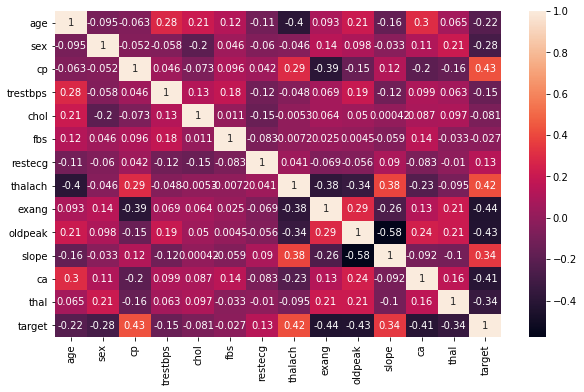

In [16]:
sns.heatmap(df.corr(), annot=True);

## The Examination of Target Variable

In [17]:
df['target'].describe()

count   302.0000000
mean      0.5430464
std       0.4989704
min       0.0000000
25%       0.0000000
50%       1.0000000
75%       1.0000000
max       1.0000000
Name: target, dtype: float64

In [18]:
print( f"Skewness: {df['target'].skew()}")

Skewness: -0.17369101189529737


In [19]:
df['target'].iplot(kind='hist')

## Numerical Features

In [20]:
df[numerical].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000,302.0000000
mean,54.4205298,0.6821192,0.9635762,131.6026490,246.5000000,0.1490066,0.5264901,149.5695364,0.3278146,1.0430464,1.3973510,0.7185430,2.3145695
std,9.0479697,0.4664257,1.0320436,17.5633942,51.7534887,0.3566860,0.5260272,22.9035273,0.4701960,1.1614523,0.6162740,1.0067483,0.6130255
min,29.0000000,0.0000000,0.0000000,94.0000000,126.0000000,0.0000000,0.0000000,71.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000
25%,48.0000000,0.0000000,0.0000000,120.0000000,211.0000000,0.0000000,0.0000000,133.2500000,0.0000000,0.0000000,1.0000000,0.0000000,2.0000000
50%,55.5000000,1.0000000,1.0000000,130.0000000,240.5000000,0.0000000,1.0000000,152.5000000,0.0000000,0.8000000,1.0000000,0.0000000,2.0000000
75%,61.0000000,1.0000000,2.0000000,140.0000000,274.7500000,0.0000000,1.0000000,166.0000000,1.0000000,1.6000000,2.0000000,1.0000000,3.0000000
max,77.0000000,1.0000000,3.0000000,200.0000000,564.0000000,1.0000000,2.0000000,202.0000000,1.0000000,6.2000000,2.0000000,4.0000000,3.0000000


In [21]:
#sns.pairplot(data=df0, hue="target", height=4, aspect =1)

In [22]:
df[numerical].iplot(kind='hist');

In [23]:
df[numerical].iplot(kind='histogram',subplots=True,bins=50)

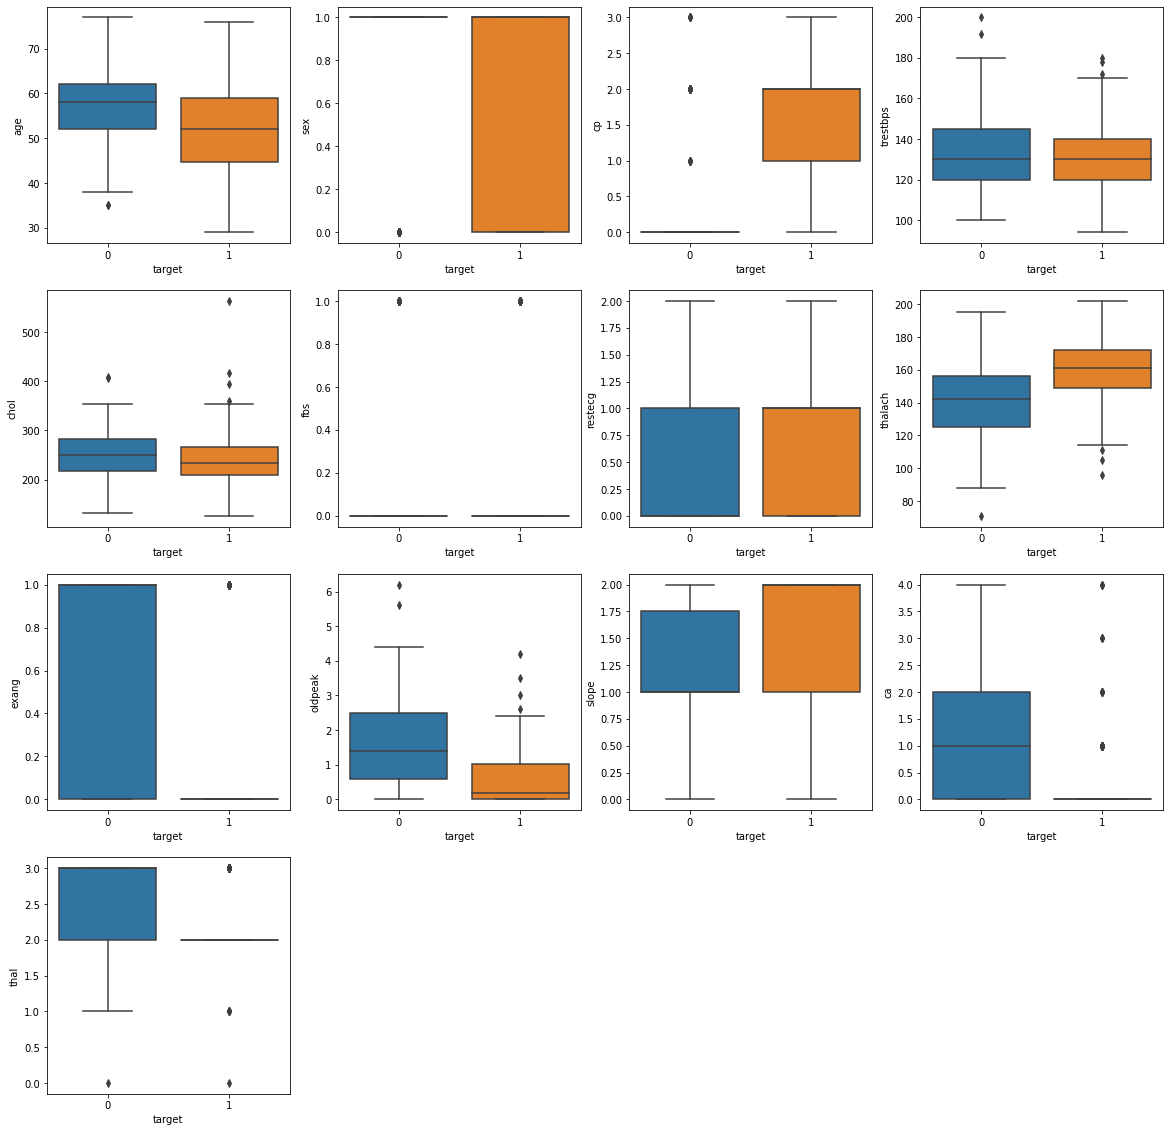

In [24]:
index = 0
plt.figure(figsize=(20,20))
for feature in numerical:
    if feature != "target":
        index += 1
        plt.subplot(4,4,index)
        sns.boxplot(x='target',y=feature,data=df)

In [25]:
skew_limit = 0.75 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = df[numerical].skew()
skew_cols= skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols

fbs        1.9812009
ca         1.2957385
oldpeak    1.2661727
chol       1.1473324
sex       -0.7861201
dtype: float64

In [26]:
df[skew_cols.index].iplot(kind='hist');

In [27]:
df[skew_cols.index].iplot(kind='histogram',subplots=True,bins=50)

# Model Selection

### Data Preprocessing

In [28]:
X = df.drop("target", axis=1)
y = df["target"]

**Train & Split**

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**Scaling**

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [33]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Implement Logistic Regression and Evaluate

**With Default Parameters**

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
log_model = LogisticRegression()

In [134]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [135]:
y_test_pred=log_model.predict(X_test_scaled)

In [38]:
y_test_pred_proba = log_model.predict_proba(X_test_scaled)

In [39]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_test_pred
test_data["pred_proba"] = y_test_pred_proba[:,1]
test_data.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred,pred_proba
5,57,1,0,140,192,0,1,148,0,0.4000000,1,0,1,1,1,0.6455172
104,50,1,2,129,196,0,1,163,0,0.0000000,2,0,2,1,1,0.8914456
17,66,0,3,150,226,0,1,114,0,2.6000000,0,0,2,1,1,0.7383176
292,58,0,0,170,225,1,0,146,1,2.8000000,1,2,1,0,0,0.2404086
9,57,1,2,150,168,0,1,174,0,1.6000000,2,0,2,1,1,0.8308501
76,51,1,2,125,245,1,0,166,0,2.4000000,1,0,2,1,1,0.7024683
284,61,1,0,140,207,0,0,138,1,1.9000000,2,1,3,0,0,0.0881475
101,59,1,3,178,270,0,0,145,0,4.2000000,0,0,3,1,0,0.1850164
300,68,1,0,144,193,1,1,141,0,3.4000000,1,2,3,0,0,0.0974805
194,60,1,2,140,185,0,0,155,0,3.0000000,1,0,2,0,1,0.5323916


## Model Performance on Classification Tasks

In [40]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [41]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[24  5]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



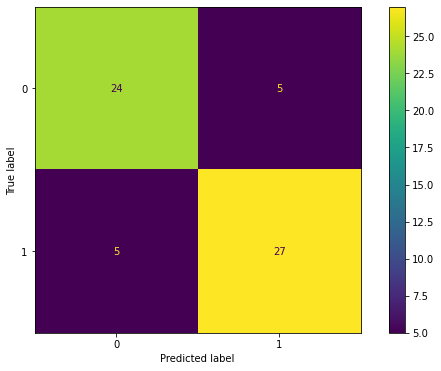

In [42]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

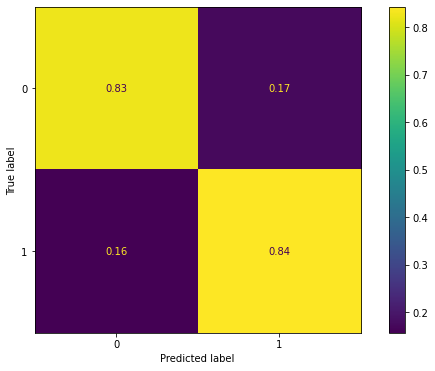

In [43]:
plot_confusion_matrix(log_model, X_test_scaled, y_test, normalize='true');

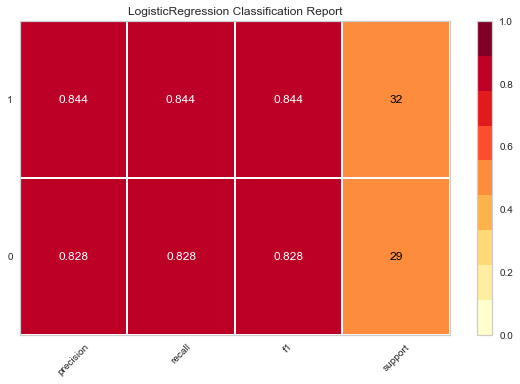

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [44]:
from yellowbrick.classifier import ConfusionMatrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(log_model)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train_scaled, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(log_model, support=True)
visualizer.fit(X_train_scaled, y_train)        # Fit the visualizer and the model
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show()

In [45]:
# print(confusion_matrix(y_test, y_test_pred)) (0.10)
# print(classification_report(y_test, y_test_pred))

In [46]:
# print(confusion_matrix(y_test, y_test_pred)) (0.15)
# print(classification_report(y_test, y_test_pred))

## Cross Validate

**NOTE: It can be implemented by either default parameter or GridSearch**

**a) Implemendation of Cross-Validation With Default Parameter**

In [47]:
from sklearn.model_selection import cross_validate

In [48]:
model = LogisticRegression()
model

# croos validate işlemi işin ayrı bir adla (model)  LogisticRegression() tanımladım.

LogisticRegression()

In [49]:
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
#df_scores
df_scores.mean()[2:]

test_accuracy    0.8381667
test_precision   0.8387225
test_recall      0.8868132
test_f1          0.8567534
dtype: float64

**b) Implemendation of Cross-Validation With Best Parameters (GridsearchCV)**

**LogisticRegression automatically makes regularizition and Default parameter is Ridge. We can change this parameter in accordance with our concept and/or dataset.**

Special Note:

Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

‘liblinear’ is limited to one-versus-rest schemes.

Warning:

The choice of the algorithm depends on the penalty chosen: Supported penalties by solver: ‘newton-cg’ - [‘l2’, ‘none’]

‘lbfgs’ - [‘l2’, ‘none’]

‘liblinear’ - [‘l1’, ‘l2’]

‘sag’ - [‘l2’, ‘none’]

‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]

**We prefer "saga" since we selected "l1", "l2" and "elasticnet" as penalty.**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


In [164]:
log_model_GridSearch = LogisticRegression(solver='saga', max_iter=5000)

# yukarda log_model = LogisticRegression() olarak tanımlamıştık. 
# bu modeli geliştirmek için GridSearchCV ile best parametrelerimizi bulmak üzere adını log_model_GridSearch yaparak yeniden tanımladım.

In [51]:
penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)

param_grid = {"penalty" : penalty,
             "l1_ratio" : l1_ratio,
             "C" : C}

In [52]:
grid_model = GridSearchCV(log_model_GridSearch, param_grid = param_grid)

In [53]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [54]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l2'}

In [55]:
y_test_pred = grid_model.predict(X_test_scaled)
y_test_pred

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

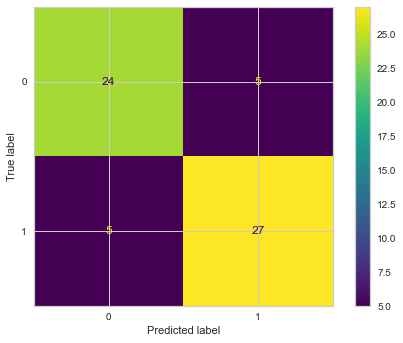

In [56]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test)

In [57]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[24  5]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [58]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

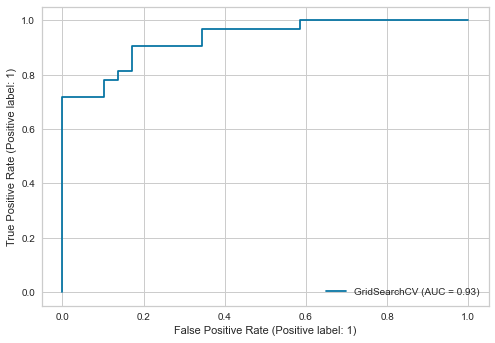

In [59]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

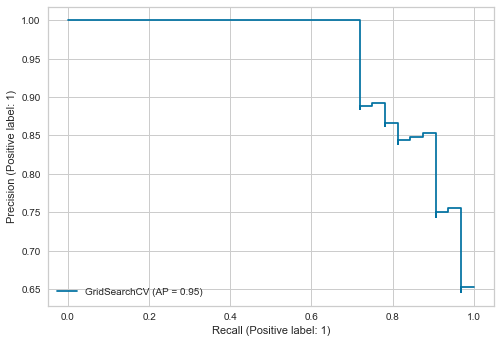

In [60]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

## Finding Best Threshold

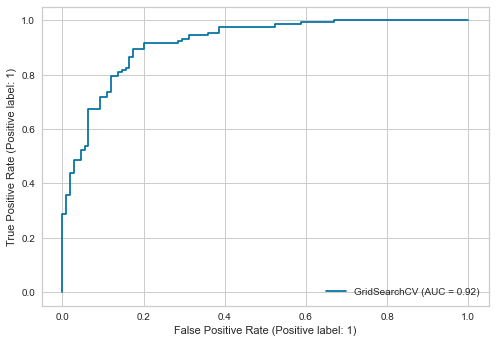

In [61]:
plot_roc_curve(grid_model, X_train_scaled, y_train);

In [62]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
roc_auc_score(y_train, y_pred_proba[:,1])

0.9176396997497915

In [63]:
fp_rate, tp_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])

In [64]:
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5311646736296827

In [65]:
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred,pred_proba
180,55,1,0,132,353,0,1,132,1,1.2000000,1,1,3,0,0,0.0707108
229,64,1,2,125,309,0,1,131,1,1.8000000,1,0,3,0,0,0.2285665
111,57,1,2,150,126,1,1,173,0,0.2000000,2,1,3,1,1,0.7580737
247,66,1,1,160,246,0,1,120,1,0.0000000,1,3,1,0,0,0.1112624
60,71,0,2,110,265,1,0,130,0,0.0000000,2,1,2,1,1,0.9187820


In [66]:
test_data["pred2"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold else 0)

In [67]:
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred,pred_proba,pred2
180,55,1,0,132,353,0,1,132,1,1.2000000,1,1,3,0,0,0.0707108,0
229,64,1,2,125,309,0,1,131,1,1.8000000,1,0,3,0,0,0.2285665,0
111,57,1,2,150,126,1,1,173,0,0.2000000,2,1,3,1,1,0.7580737,1
247,66,1,1,160,246,0,1,120,1,0.0000000,1,3,1,0,0,0.1112624,0
60,71,0,2,110,265,1,0,130,0,0.0000000,2,1,2,1,1,0.9187820,1


In [68]:
y_test_pred2 = test_data["pred2"]

In [169]:
print(confusion_matrix(y_test,y_test_pred2))
print(classification_report(y_test,y_test_pred2))

[[24  5]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [70]:
print(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_test,y_test_pred))

[[24  5]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



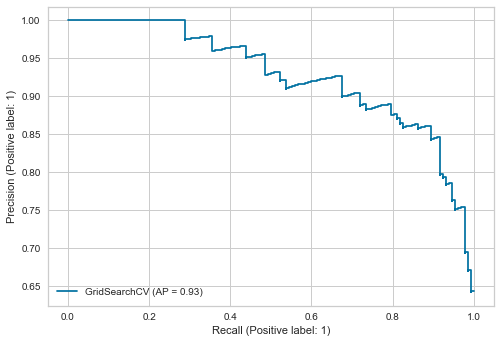

In [71]:
plot_precision_recall_curve(grid_model, X_train_scaled, y_train);

In [72]:
y_pred_proba = grid_model.predict_proba(X_train_scaled)
average_precision_score(y_train, y_pred_proba[:,1])

0.9273915468566818

In [73]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [74]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  # harmonic mean
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.4847469006742245

In [75]:
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred,pred_proba,pred2
180,55,1,0,132,353,0,1,132,1,1.2000000,1,1,3,0,0,0.0707108,0
229,64,1,2,125,309,0,1,131,1,1.8000000,1,0,3,0,0,0.2285665,0
111,57,1,2,150,126,1,1,173,0,0.2000000,2,1,3,1,1,0.7580737,1
247,66,1,1,160,246,0,1,120,1,0.0000000,1,3,1,0,0,0.1112624,0
60,71,0,2,110,265,1,0,130,0,0.0000000,2,1,2,1,1,0.9187820,1


In [76]:
test_data["pred3"] = test_data["pred_proba"].apply(lambda x : 1 if x >= optimal_threshold else 0)

In [77]:
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred,pred_proba,pred2,pred3
180,55,1,0,132,353,0,1,132,1,1.2000000,1,1,3,0,0,0.0707108,0,0
229,64,1,2,125,309,0,1,131,1,1.8000000,1,0,3,0,0,0.2285665,0,0
111,57,1,2,150,126,1,1,173,0,0.2000000,2,1,3,1,1,0.7580737,1,1
247,66,1,1,160,246,0,1,120,1,0.0000000,1,3,1,0,0,0.1112624,0,0
60,71,0,2,110,265,1,0,130,0,0.0000000,2,1,2,1,1,0.9187820,1,1


In [78]:
y_test_pred3 = test_data["pred3"]

In [170]:
print(confusion_matrix(y_test,y_test_pred3))
print(classification_report(y_test,y_test_pred3))

[[24  5]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



# Implement KNN and Evaluate

In [80]:
X = df.drop("target", axis=1)
y = df["target"]

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
scaler = MinMaxScaler()

In [84]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Modelling

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
knn_model = KNeighborsClassifier(n_neighbors=5) 

In [87]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier()

In [88]:
y_test_pred = knn_model.predict(scaled_X_test)
y_test_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [89]:
y_test_pred_proba = knn_model.predict_proba(scaled_X_test)
y_test_pred_proba

array([[1. , 0. ],
       [0.4, 0.6],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.4, 0.6],
       [0. , 1. ],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.6, 0.4],
       [0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.8, 0.2],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0. ,

In [90]:
pd.DataFrame(y_test_pred_proba)

,0,1
0,1.0000000,0.0000000
1,0.4000000,0.6000000
2,0.0000000,1.0000000
3,1.0000000,0.0000000
4,0.2000000,0.8000000
5,0.0000000,1.0000000
6,0.8000000,0.2000000
7,1.0000000,0.0000000
8,1.0000000,0.0000000
9,0.4000000,0.6000000


In [91]:
my_dict = {"Actual": y_test, "Pred":y_test_pred, "Proba_1":y_test_pred_proba[:,1], "Proba_0":y_test_pred_proba[:,0]}

In [92]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
232,0,0,0.0000000,1.0000000
90,1,1,1.0000000,0.0000000
45,1,1,1.0000000,0.0000000
256,0,0,0.0000000,1.0000000
33,1,1,0.6000000,0.4000000
224,0,0,0.0000000,1.0000000
285,0,0,0.0000000,1.0000000
268,0,0,0.0000000,1.0000000
250,0,0,0.0000000,1.0000000
9,1,1,1.0000000,0.0000000


### Model Performance on Classification Tasks

In [93]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [94]:
confusion_matrix(y_test, y_test_pred)

array([[27,  2],
       [ 7, 25]], dtype=int64)

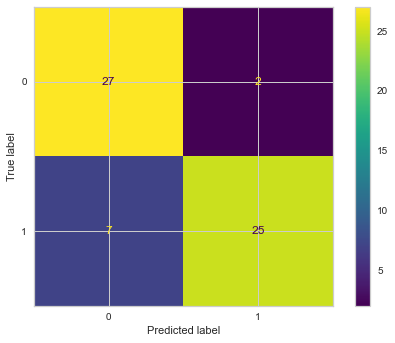

In [95]:
plot_confusion_matrix(knn_model, scaled_X_test, y_test);

In [96]:
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[27  2]
 [ 7 25]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



### Elbow Method for Choosing Reasonable K Values

In [97]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [98]:
test_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train) 
   
    y_test_pred = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test,y_test_pred)
    test_error_rates.append(test_error)
    print("k=", k, "için error_rate:", test_error)

k= 1 için error_rate: 0.14754098360655743
k= 2 için error_rate: 0.24590163934426235
k= 3 için error_rate: 0.14754098360655743
k= 4 için error_rate: 0.19672131147540983
k= 5 için error_rate: 0.14754098360655743
k= 6 için error_rate: 0.180327868852459
k= 7 için error_rate: 0.16393442622950816
k= 8 için error_rate: 0.16393442622950816
k= 9 için error_rate: 0.1311475409836066
k= 10 için error_rate: 0.1311475409836066
k= 11 için error_rate: 0.16393442622950816
k= 12 için error_rate: 0.16393442622950816
k= 13 için error_rate: 0.19672131147540983
k= 14 için error_rate: 0.21311475409836067
k= 15 için error_rate: 0.2295081967213115
k= 16 için error_rate: 0.21311475409836067
k= 17 için error_rate: 0.19672131147540983
k= 18 için error_rate: 0.21311475409836067
k= 19 için error_rate: 0.19672131147540983
k= 20 için error_rate: 0.19672131147540983
k= 21 için error_rate: 0.21311475409836067
k= 22 için error_rate: 0.2295081967213115
k= 23 için error_rate: 0.21311475409836067
k= 24 için error_rate: 0.1

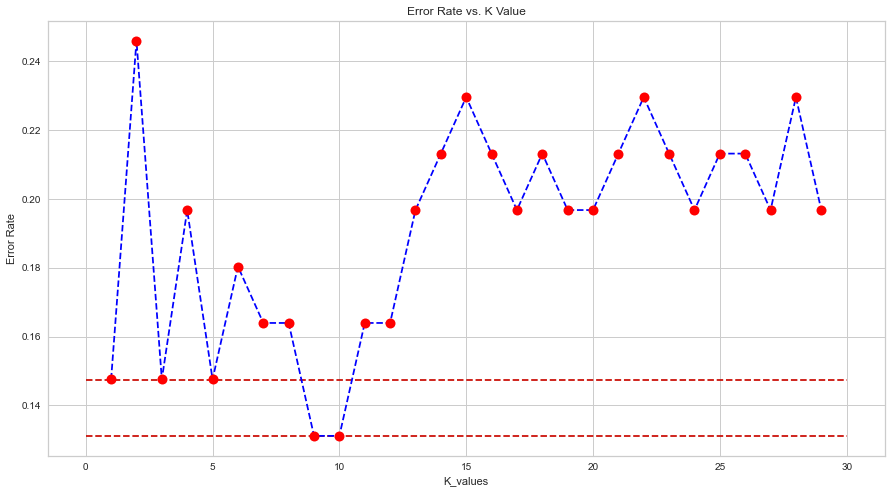

In [99]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.1311, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.1475, xmin = 0, xmax = 30, colors= 'r', linestyles="--")


### Scores by Value of K = 8

In [100]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print('WITH K=9')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=9


[[28  1]
 [ 7 25]]


              precision    recall  f1-score   support

           0       0.80      0.97      0.88        29
           1       0.96      0.78      0.86        32

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



### Gridsearch Method for Choosing Reasonable K Values

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
knn_grid = KNeighborsClassifier()

In [103]:
k_values= range(1,30)

In [104]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [105]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [106]:
knn_grid_model.fit(scaled_X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [107]:
k_best = GridSearchCV(knn, {"n_neighbors": np.arange(1,30,1)}, cv = 10).\
                      fit(X_train, y_train).best_params_["n_neighbors"]
    
knn_tuned = KNeighborsRegressor(n_neighbors = k_best).fit(X_train, y_train)
print(k_best)
print(knn_tuned.metric)
y_test_pred = knn_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_test_pred))


17
minkowski


0.46262549598751423

In [108]:
knn_grid_model.best_params_

{'n_neighbors': 27, 'p': 1, 'weights': 'uniform'}

In [109]:
knn = KNeighborsClassifier(n_neighbors = 9, p = 1)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print('WITH K=9')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K=9


[[27  2]
 [ 5 27]]


              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [110]:
# knn = KNeighborsClassifier(n_neighbors = 4, p = 1)

# knn.fit(scaled_X_train,y_train)
# pred = knn.predict(scaled_X_test)

# print('WITH K=8')
# print('\n')
# print(confusion_matrix(y_test, pred))
# print('\n')
# print(classification_report(y_test, pred))

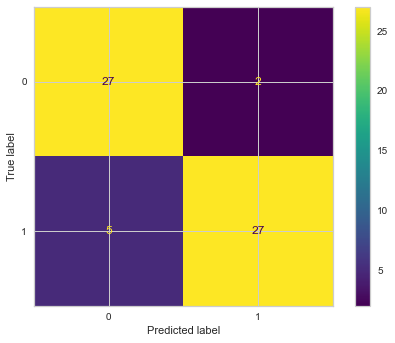

In [111]:
plot_confusion_matrix(knn, X_test_scaled, y_test);

# Implement SVM and Evaluate

In [112]:
X = df.drop("target", axis=1)
y = df["target"]

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
from sklearn.preprocessing import MinMaxScaler

In [116]:
scaler = MinMaxScaler()

In [117]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Modelling and Model Performance

In [118]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [119]:
svm_model_scaled = SVC(random_state=42, probability=True)

svm_model_scaled.fit(X_train_scaled, y_train)
y_test_pred = svm_model_scaled.predict(X_test_scaled)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[27  2]
 [ 7 25]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



**SVC with Cross Validation**

In [151]:
model_SVC = SVC(random_state=42, probability=True)

scores = cross_validate(model_SVC, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.8178333
test_precision   0.8268330
test_recall      0.8637363
test_f1          0.8394725
dtype: float64

### With Best Parameters (GridsearchCV)

In [153]:
from sklearn.model_selection import GridSearchCV

In [154]:
param_grid = {'C': [0.1,1, 10, 100, 1000, 5000],
              'gamma': ["scale", "auto", 1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf', 'linear']}

In [155]:
model_SVC = SVC(random_state=42, probability=True)

svm_model_grid = GridSearchCV(model_SVC, param_grid, verbose=3, refit=True)

In [156]:
svm_model_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[CV 1/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.755 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.812 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.771 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.792 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.729 total time=   0.0s
[CV 1/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.755 total time=   0.0s
[CV 2/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.854 total time=   0.0s
[CV 3/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.792 total time=   0.0s
[CV 4/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.812 total time=   0.0s
[CV 5/5] END .C=0.1, gamma=scale, kernel=linear;, score=0.750 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=auto, kernel=rbf;, score=0.653 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=auto, kernel=rbf

[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.796 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.917 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.833 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.812 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.771 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.755 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.792 total time=   0.0s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.771 total time=   0.0s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.750 total time=   0.0s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.708 total time=   0.0s
[CV 1/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.796 total time=   0.0s
[CV 2/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.917 total time=   0.0s
[CV 3/5] END ....C=1, gamma=

[CV 2/5] END .C=100, gamma=scale, kernel=linear;, score=0.917 total time=   0.0s
[CV 3/5] END .C=100, gamma=scale, kernel=linear;, score=0.812 total time=   0.0s
[CV 4/5] END .C=100, gamma=scale, kernel=linear;, score=0.875 total time=   0.0s
[CV 5/5] END .C=100, gamma=scale, kernel=linear;, score=0.771 total time=   0.0s
[CV 1/5] END .....C=100, gamma=auto, kernel=rbf;, score=0.796 total time=   0.0s
[CV 2/5] END .....C=100, gamma=auto, kernel=rbf;, score=0.854 total time=   0.0s
[CV 3/5] END .....C=100, gamma=auto, kernel=rbf;, score=0.854 total time=   0.0s
[CV 4/5] END .....C=100, gamma=auto, kernel=rbf;, score=0.833 total time=   0.0s
[CV 5/5] END .....C=100, gamma=auto, kernel=rbf;, score=0.792 total time=   0.0s
[CV 1/5] END ..C=100, gamma=auto, kernel=linear;, score=0.837 total time=   0.0s
[CV 2/5] END ..C=100, gamma=auto, kernel=linear;, score=0.917 total time=   0.0s
[CV 3/5] END ..C=100, gamma=auto, kernel=linear;, score=0.812 total time=   0.0s
[CV 4/5] END ..C=100, gamma=

[CV 4/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.875 total time=   0.2s
[CV 5/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.792 total time=   0.1s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.816 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.875 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.833 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.854 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.792 total time=   0.0s
[CV 1/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.837 total time=   0.0s
[CV 2/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.917 total time=   0.4s
[CV 3/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.812 total time=   0.2s
[CV 4/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.875 total time=   0.2s
[CV 5/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.792 total time=   0.1s
[CV 1/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(probability=True, random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 5000],
                         'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001,
                                   0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [159]:
svm_model_grid.best_params_

{'C': 5000, 'gamma': 0.001, 'kernel': 'rbf'}

In [160]:
svm_model_grid.best_estimator_

SVC(C=5000, gamma=0.001, probability=True, random_state=42)

In [161]:
y_test_pred = svm_model_grid.predict(X_test_scaled)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[25  4]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



### Model Performance on Classification Tasks

In [162]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [163]:
confusion_matrix(y_test, y_test_pred)

# svm_model_grid'in confusion_matrix değerleri.

array([[25,  4],
       [ 6, 26]], dtype=int64)

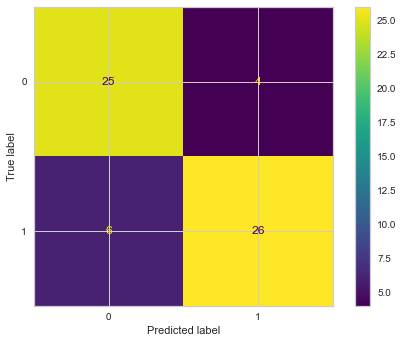

In [130]:
plot_confusion_matrix(svm_model_grid, scaled_X_test, y_test);

# Visually compare models based on your chosen metric

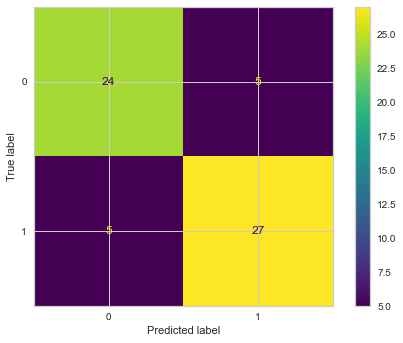

In [165]:
plot_confusion_matrix(log_model, X_test_scaled, y_test);

# bu ilk yaptığımız ilkel logistic Regression modeline ait.

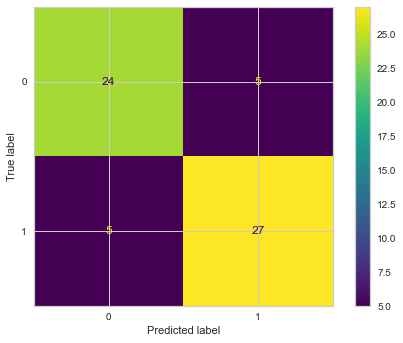

In [137]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test);

# bu, log_model'in GridSearch yapılarak geliştirilmiş haline ait.
# parametreler ile geliştirmemize rağmen değerlerin aynı olduğunu görüyoruz. 

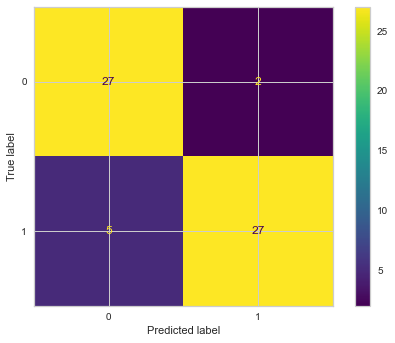

In [145]:
plot_confusion_matrix(knn, X_test_scaled, y_test);

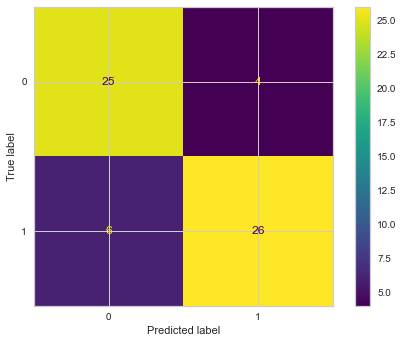

In [139]:
plot_confusion_matrix(svm_model_grid, scaled_X_test, y_test);

In [174]:
y_test_pred = knn.predict(X_test_scaled)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

# bu modelin skorları en yüksek olduğu için best model olarak knn'yi seçiyorum.

[[27  2]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



# Chose best model and make a random prediction

### Final Model

In [172]:
scaler = MinMaxScaler().fit(X)

In [173]:
X_scaled = scaler.transform(X)
X_scaled

array([[0.70833333, 1.        , 1.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.16666667, 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.66666667],
       [0.25      , 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.8125    , 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.58333333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.5       , 0.25      ,
        0.66666667]])

In [176]:
final_model = knn.fit(X_scaled, y)
final_model

KNeighborsClassifier(n_neighbors=9, p=1)

In [179]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0000000,54.4205298,9.0479697,29.0000000,48.0000000,55.5000000,61.0000000,77.0000000
sex,302.0000000,0.6821192,0.4664257,0.0000000,0.0000000,1.0000000,1.0000000,1.0000000
cp,302.0000000,0.9635762,1.0320436,0.0000000,0.0000000,1.0000000,2.0000000,3.0000000
trestbps,302.0000000,131.6026490,17.5633942,94.0000000,120.0000000,130.0000000,140.0000000,200.0000000
chol,302.0000000,246.5000000,51.7534887,126.0000000,211.0000000,240.5000000,274.7500000,564.0000000
fbs,302.0000000,0.1490066,0.3566860,0.0000000,0.0000000,0.0000000,0.0000000,1.0000000
restecg,302.0000000,0.5264901,0.5260272,0.0000000,0.0000000,1.0000000,1.0000000,2.0000000
thalach,302.0000000,149.5695364,22.9035273,71.0000000,133.2500000,152.5000000,166.0000000,202.0000000
exang,302.0000000,0.3278146,0.4701960,0.0000000,0.0000000,0.0000000,1.0000000,1.0000000
oldpeak,302.0000000,1.0430464,1.1614523,0.0000000,0.0000000,0.8000000,1.6000000,6.2000000


### Model Deployment

In [180]:
import pickle
pickle.dump(scaler, open("scaler_target", 'wb'))

In [181]:
pickle.dump(final_model, open("final_model_target", 'wb'))

In [185]:
my_dict = {"age": [18,43,67,24,79],
           "sex":[0,0,1,1,0],
           "cp":[0,1,1,3,2],
           "trestbps": [90,110,130,80,120],
           "chol": [202,244,269,212,224],
           "fbs": [1,1,0,1,0],
           "restecg": [0,1,1,0,0],
           "thalach": [154,167,142,179,191],
           "exang": [0,1,0,1,1],
           "oldpeak": [0.90,1.40,2.20,1.70,1.10],
           "slope": [1,0,0,2,1],
           "ca": [1,0,3,4,2],
           "thal": [0,3,1,2,1]
          }

In [186]:
sample = pd.DataFrame(my_dict)
sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,18,0,0,90,202,1,0,154,0,0.9000000,1,1,0
1,43,0,1,110,244,1,1,167,1,1.4000000,0,0,3
2,67,1,1,130,269,0,1,142,0,2.2000000,0,3,1
3,24,1,3,80,212,1,0,179,1,1.7000000,2,4,2
4,79,0,2,120,224,0,0,191,1,1.1000000,1,2,1


In [187]:
scaler_target = pickle.load(open("scaler_target", "rb"))

In [188]:
sample_scaled = scaler_target.transform(sample)
sample_scaled

array([[-0.22916667,  0.        ,  0.        , -0.03773585,  0.17351598,
         1.        ,  0.        ,  0.63358779,  0.        ,  0.14516129,
         0.5       ,  0.25      ,  0.        ],
       [ 0.29166667,  0.        ,  0.33333333,  0.1509434 ,  0.26940639,
         1.        ,  0.5       ,  0.73282443,  1.        ,  0.22580645,
         0.        ,  0.        ,  1.        ],
       [ 0.79166667,  1.        ,  0.33333333,  0.33962264,  0.32648402,
         0.        ,  0.5       ,  0.54198473,  0.        ,  0.35483871,
         0.        ,  0.75      ,  0.33333333],
       [-0.10416667,  1.        ,  1.        , -0.13207547,  0.19634703,
         1.        ,  0.        ,  0.82442748,  1.        ,  0.27419355,
         1.        ,  1.        ,  0.66666667],
       [ 1.04166667,  0.        ,  0.66666667,  0.24528302,  0.22374429,
         0.        ,  0.        ,  0.91603053,  1.        ,  0.17741935,
         0.5       ,  0.5       ,  0.33333333]])

In [189]:
final_model = pickle.load(open("final_model_target", "rb"))

In [190]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)
predictions2 = [1 if i >= optimal_threshold else 0 for i in predictions_proba[:,1]]

In [191]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred"] = predictions
sample["pred2"] = predictions2
sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,pred_proba,pred,pred2
0,18,0,0,90,202,1,0,154,0,0.9000000,1,1,0,0.6666667,1,1
1,43,0,1,110,244,1,1,167,1,1.4000000,0,0,3,0.3333333,0,0
2,67,1,1,130,269,0,1,142,0,2.2000000,0,3,1,0.3333333,0,0
3,24,1,3,80,212,1,0,179,1,1.7000000,2,4,2,0.4444444,0,0
4,79,0,2,120,224,0,0,191,1,1.1000000,1,2,1,0.6666667,1,1
